<a href="https://colab.research.google.com/github/kywch/geo-colab/blob/master/Chicago_Clear_LST_24hr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio

In [ ]:
# Import necessary packages
import os, os.path
from glob import glob
from shutil import copyfile
import pickle

import folium
from folium import plugins
import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import show

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.cbook import flatten
from matplotlib import colors as colors
import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
files = glob("drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/*.tif")
print(files)

['drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c23_MuSLI_Cloud_Chicago.201906072300.001.20201004233757.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c15_MuSLI_Cloud_Chicago.201906071500.001.20201004163116.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c13_MuSLI_Cloud_Chicago.201906071300.001.20201004144144.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c19_MuSLI_Cloud_Chicago.201906071900.001.20201004200221.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c22_MuSLI_Cloud_Chicago.201906072200.001.20201004224258.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c16_MuSLI_Cloud_Chicago.201906071600.001.20201004172527.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c17_MuSLI_Cloud_Chicago.201906071700.001.20201004182000.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c20_MuSLI_Cloud_Chicago.201906072000.001.20201004205006.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c18_MuSLI_Cloud_Chicago.201906071800.001.20201004191245.tif', 'drive/My Drive/SatTemp/SatTemp_Glyn

In [ ]:
!rm -rf geotiff
if not os.path.exists('geotiff'):
  os.mkdir('geotiff')

In [ ]:
# copy these files from Google Drive to colab disk
for f in files:
  print(f)
  copyfile(f, 'geotiff/' + os.path.basename(f))

drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c23_MuSLI_Cloud_Chicago.201906072300.001.20201004233757.tif
drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c15_MuSLI_Cloud_Chicago.201906071500.001.20201004163116.tif
drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c13_MuSLI_Cloud_Chicago.201906071300.001.20201004144144.tif
drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c19_MuSLI_Cloud_Chicago.201906071900.001.20201004200221.tif
drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c22_MuSLI_Cloud_Chicago.201906072200.001.20201004224258.tif
drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c16_MuSLI_Cloud_Chicago.201906071600.001.20201004172527.tif
drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c17_MuSLI_Cloud_Chicago.201906071700.001.20201004182000.tif
drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c20_MuSLI_Cloud_Chicago.201906072000.001.20201004205006.tif
drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c18_MuSLI_Cloud_Chicago.201906071800.001.20201004191245.tif
drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/c12_MuSLI_Cloud_Chic

In [ ]:
# sorting will give us the files from June 1st 00 hour to June 3rd 23 hour
lst_files = glob("geotiff/*LST*.tif")
lst_files.sort()
print(lst_files)

cloud_files = glob("geotiff/*Cloud*.tif")
cloud_files.sort()
print(cloud_files)

all_files = glob("geotiff/*.tif")
all_files.sort()
print(all_files)

['geotiff/l00_MuSLI_LST_Chicago.201906080000.001.20201005003546.tif', 'geotiff/l01_MuSLI_LST_Chicago.201906080100.001.20201005013056.tif', 'geotiff/l02_MuSLI_LST_Chicago.201906080200.001.20201005022717.tif', 'geotiff/l03_MuSLI_LST_Chicago.201906080300.001.20201005031952.tif', 'geotiff/l04_MuSLI_LST_Chicago.201906080400.001.20201005041044.tif', 'geotiff/l05_MuSLI_LST_Chicago.201906080500.001.20201005051113.tif', 'geotiff/l06_MuSLI_LST_Chicago.201906080600.001.20201005061306.tif', 'geotiff/l07_MuSLI_LST_Chicago.201906080700.001.20201005071218.tif', 'geotiff/l08_MuSLI_LST_Chicago.201906080800.001.20201005081333.tif', 'geotiff/l09_MuSLI_LST_Chicago.201906080900.001.20201005091124.tif', 'geotiff/l10_MuSLI_LST_Chicago.201906081000.001.20201005100701.tif', 'geotiff/l11_MuSLI_LST_Chicago.201906081100.001.20201005110041.tif', 'geotiff/l12_MuSLI_LST_Chicago.201906071200.001.20201004135003.tif', 'geotiff/l13_MuSLI_LST_Chicago.201906071300.001.20201004144144.tif', 'geotiff/l14_MuSLI_LST_Chicago.20

In [ ]:
for file in lst_files[:3]:
  print(file.split('_'))
  print(file.split('_')[0].split('/')[1])
  #print(file.split('_')[1] + '_' + file.split('_')[2][14:16] + '-' + file.split('_')[2][16:18])
#lst_files[num].split('_')[3] + '_' + lst_files[num].split('_')[4]

for file in cloud_files[:3]:
  print(file.split('_'))
  print(file.split('_')[0].split('/')[1])
  #print(file.split('_')[1] + '_' + file.split('_')[2][14:16] + '-' + file.split('_')[2][16:18])


['geotiff/l00', 'MuSLI', 'LST', 'Chicago.201906080000.001.20201005003546.tif']
l00
['geotiff/l01', 'MuSLI', 'LST', 'Chicago.201906080100.001.20201005013056.tif']
l01
['geotiff/l02', 'MuSLI', 'LST', 'Chicago.201906080200.001.20201005022717.tif']
l02
['geotiff/c00', 'MuSLI', 'Cloud', 'Chicago.201906080000.001.20201005003546.tif']
c00
['geotiff/c01', 'MuSLI', 'Cloud', 'Chicago.201906080100.001.20201005013056.tif']
c01
['geotiff/c02', 'MuSLI', 'Cloud', 'Chicago.201906080200.001.20201005022717.tif']
c02


In [ ]:
boundary = {}
raster = {}
nodata = {}
src_crs = {}

for file in all_files:
  #key = file.split('_')[2] + '_' + file.split('_')[3]
  #key = file.split('_')[1] + '_' + file.split('_')[2][14:16] + '-' + file.split('_')[2][16:18]
  key = file.split('_')[0].split('/')[1]
  #print(key)
  with rio.open(file) as src:
    boundary[key] = src.bounds
    if 'LST' in file:
      raster[key] = src.read() - 273.15
    else:
      raster[key] = src.read()
    nodata[key] = src.nodata
    src_crs[key] = src.crs

print(raster.keys())

dict_keys(['c00', 'c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'l00', 'l01', 'l02', 'l03', 'l04', 'l05', 'l06', 'l07', 'l08', 'l09', 'l10', 'l11', 'l12', 'l13', 'l14', 'l15', 'l16', 'l17', 'l18', 'l19', 'l20', 'l21', 'l22', 'l23'])


In [ ]:
prop_nan = {}

tmp_raster = raster['l00']
tmp_raster[raster['c00'] == 1] = np.nan
tmp_raster[raster['l00'] < 0] = np.nan
prop_nan['00'] = np.average(np.isnan(tmp_raster))

masked_raster = tmp_raster
print(masked_raster.shape)

for ii in range(1,24):
  # apply the cloud mask
  tmp_raster = raster['l' + str(ii).zfill(2)]
  tmp_raster[raster['c' + str(ii).zfill(2)] == 1] = np.nan
  tmp_raster[raster['l' + str(ii).zfill(2)] < 0] = np.nan
  prop_nan[str(ii).zfill(2)] = np.average(np.isnan(tmp_raster))
  # concatenate to make the timed LST from 00 hour to 23 hour
  masked_raster = np.concatenate((masked_raster, tmp_raster), axis=0)

print(masked_raster.shape)

(1, 685, 952)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


(24, 685, 952)


In [ ]:
prop_nan

{'00': 0.0,
 '01': 0.0,
 '02': 0.0,
 '03': 0.0,
 '04': 0.0,
 '05': 0.0,
 '06': 0.0,
 '07': 0.0,
 '08': 0.0,
 '09': 0.0,
 '10': 0.0,
 '11': 0.0,
 '12': 0.008102803165061645,
 '13': 0.0,
 '14': 0.0,
 '15': 0.0,
 '16': 0.039896031405262836,
 '17': 0.04063055879286021,
 '18': 0.025578114457461817,
 '19': 0.02799791449426486,
 '20': 0.0028614365454210883,
 '21': 0.0,
 '22': 0.0026360179108139608,
 '23': 0.015397472857756242}

In [ ]:
# UTC -> CST time convert
# 6 hours differences, so that 
# 19 hour -> 13 hour (1 PM)

masked_raster_CST = np.concatenate((masked_raster[6:], masked_raster[:6]), axis=0)
print(masked_raster_CST.shape)

(24, 685, 952)


In [ ]:
# create a wide-form pandas
masked_raster_df = pd.DataFrame()
for ii in range(24):
  masked_raster_df[ii] = masked_raster[ii].flatten()

for ii in range(24):
  masked_raster_df[24+ii] = masked_raster_CST[ii].flatten()

#masked_raster_df.info()

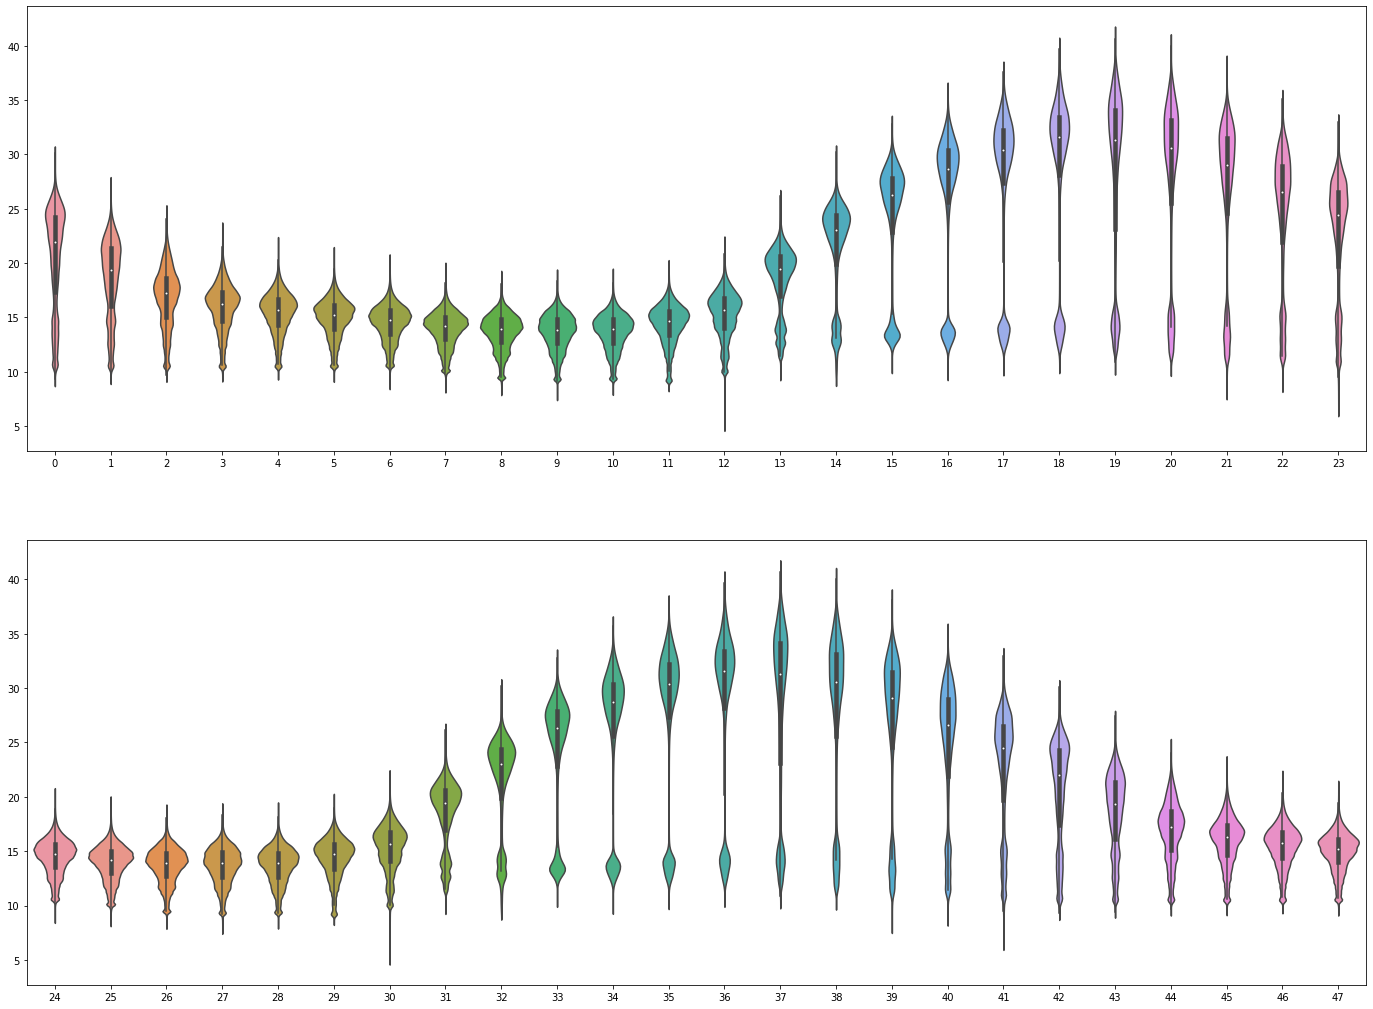

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(24,18))

sns.violinplot(data=masked_raster_df.iloc[:,0:24], ax=axs[0])
sns.violinplot(data=masked_raster_df.iloc[:,24:48], ax=axs[1])

In [ ]:
# save the processed geotiff file

geo_data = {}
geo_data['lst_files'] = lst_files
geo_data['cloud_files'] = cloud_files
geo_data['boundary'] = boundary
geo_data['src_crs'] = src_crs
geo_data['lst_raster'] = masked_raster

datafile = open('drive/My Drive/SatTemp/SatTemp_Glynn_SELECT/processed.pkl', 'wb')
pickle.dump(geo_data, datafile)                      
datafile.close()

In [ ]:
#boundary['l00']
masked_raster[0].shape


(685, 952)

In [ ]:
raster_shape = masked_raster[0].shape
raster_bound = boundary['l00']

uchicago_loc = [41.7886, -87.5987] # lat, lng

def coord_to_raster(coord, bound, shape):
  slope_lat = (bound[3] - bound[1]) / shape[0]
  slope_lng = (bound[2] - bound[0]) / shape[1]

  rst_lat = round((bound[3] - coord[0]) / slope_lat) # lat
  rst_lng = round((coord[1] - bound[0]) / slope_lng) # lng
  
  print(coord, ' : (', rst_lat, ',', rst_lng, ')')
  return (rst_lat, rst_lng)

coord_to_raster([raster_bound[1],raster_bound[0]], raster_bound, raster_shape)

coord_to_raster([raster_bound[1],raster_bound[2]], raster_bound, raster_shape)

coord_to_raster([raster_bound[3],raster_bound[0]], raster_bound, raster_shape)

coord_to_raster([raster_bound[3],raster_bound[2]], raster_bound, raster_shape)

coord_to_raster(uchicago_loc, raster_bound, raster_shape)

[41.46612652341049, -88.26368408376308]  : ( 685 , 0 )
[41.46612652341049, -87.31312550993508]  : ( 685 , 952 )
[42.14968408376307, -88.26368408376308]  : ( 0 , 0 )
[42.14968408376307, -87.31312550993508]  : ( 0 , 952 )
[41.7886, -87.5987]  : ( 362 , 666 )


(362, 666)

In [ ]:
def mapvalue2color(value, cmap): 
    """
    Map a pixel value of image to a color in the rgba format. 
    As a special case, nans will be mapped totally transparent.
    
    Inputs
        -- value - pixel value of image, could be np.nan
        -- cmap - a linear colormap from branca.colormap.linear
    Output
        -- a color value in the rgba format (r, g, b, a)    
    """
    if np.isnan(value):
        return (1, 0, 0, 0)
    else:
        return colors.to_rgba(cmap(value), 0.85)

uchicago_loc = [41.7886, -87.5987]
bounds = [[boundary['c00'].bottom, boundary['c00'].left], [boundary['c00'].top, boundary['c00'].right]],

# Create a map using the Map() function and the coordinates for Chicago, IL
m = folium.Map(location=uchicago_loc, 
               tiles='Stamen Terrain', 
               zoom_start=14)

# best LST maps
# Check the previous weather here: https://www.timeanddate.com/weather/usa/chicago/historic?month=6&year=2019
# '07-15'
# '11-14'

curr_map = masked_raster_CST[9]

curr_map[361:364, 665:668] = 0
curr_map[362, 666] = 50

# adjust the color map
import branca.colormap as cm
tmin = 15 #np.floor(np.nanmin(masked_raster[key]))
tmax = 40 #np.ceil(np.nanmax(masked_raster[key]))
tmp_color = cm.linear.RdBu_11.colors.copy()
#tmp_color = cm.linear.Greys_09.colors
tmp_color.reverse()
colormap = cm.LinearColormap(
    colors = tmp_color, 
    vmin = tmin, 
    vmax = tmax)
print('Colormap range: ', tmin, tmax)

# overlay the raster
folium.raster_layers.ImageOverlay(
    image = curr_map,
    opacity = 0.7,
    pixelated = True,
    bounds = bounds,
    colormap= lambda value: mapvalue2color(value, colormap)
).add_to(m)

folium.Marker(uchicago_loc, popup='UChicago').add_to(m)

folium.LayerControl().add_to(m)
colormap.caption = 'MuSLI_LST'
m.add_child(colormap)

m


Colormap range:  15 40
